In [1]:
import cv2 
import numpy as np

In [74]:
img1 = cv2.imread('cedar1.JPG')
print(img1.shape)

(256, 256, 3)


In [75]:
twoDim1 = img1.reshape((-1,3))
print(twoDim1.shape)

(65536, 3)


In [76]:
twoDim1 = np.float32(twoDim1)

In [77]:
criteria = ( cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0 )


In [82]:
k = 10
attamps = 10

In [83]:
ret, label, center = cv2.kmeans(twoDim1, k , None, criteria, attamps, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

In [84]:
res = center[label.flatten()]
result_image = res.reshape((img1.shape))

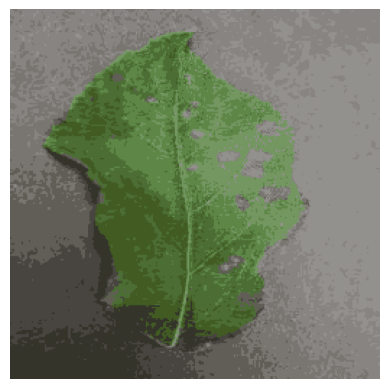

In [85]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.show()


In [21]:
img2 = cv2.imread('image2.jpg')
twoDim2 = img2.reshape((-1,3))
twoDim2 = np.float32(twoDim2)


In [22]:
ret, label, center = cv2.kmeans(twoDim2, k , None, criteria, attamps, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

In [23]:
res = center[label.flatten()]
result_image1 = res.reshape((img2.shape))

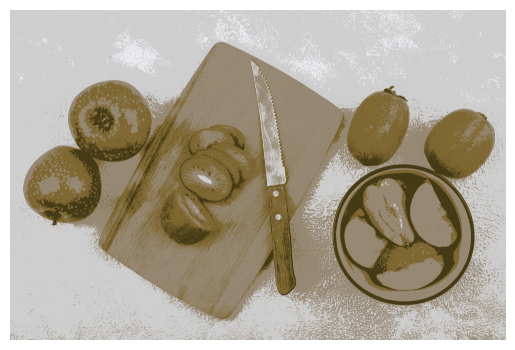

In [24]:
plt.imshow(cv2.cvtColor(result_image1, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.show()

(256, 256, 3)
(65536, 3)


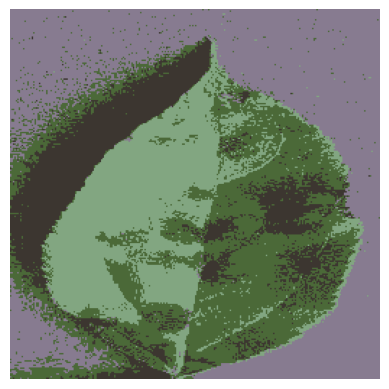

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift


img1 = cv2.imread('scab1.JPG')
print(img1.shape)

twoDim1 = img1.reshape((-1, 3))
print(twoDim1.shape)

twoDim1 = np.float32(twoDim1)

mean_shift = MeanShift(bandwidth=30, bin_seeding=True)  
mean_shift.fit(twoDim1)

labels = mean_shift.labels_

segmented_image = mean_shift.cluster_centers_[labels].astype(np.uint8)

segmented_image = segmented_image.reshape(img1.shape)

plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
